In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import gmaps
import gmaps.datasets

import ipyleaflet
from ipyleaflet import Map, Heatmap, basemaps

gmaps.configure(api_key='ssssssssssssssegegegege')

coordenadas = delitos2019[['lat', 'long']]

gmaps.headmap_layer(coordenadas)

In [4]:
delito2019 = pd.read_csv('delitos_2019.csv')
delito2019

,id,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,374556,2019-01-01,12,Lesiones,Siniestro Vial,1.0,4.0,Nueva Pompeya,-34.648387,-58.404748
1,426152,2019-01-01,6,Robo (con violencia),NaN,1.0,9.0,Liniers,-34.649827,-58.513859
2,371604,2019-01-01,8,Lesiones,Siniestro Vial,1.0,15.0,Chacarita,-34.588108,-58.439392
3,425359,2019-01-01,16,Hurto (sin violencia),Hurto Automotor,1.0,10.0,Floresta,-34.631877,-58.483975
4,437571,2019-01-01,2,Robo (con violencia),Robo Automotor,1.0,4.0,Parque Patricios,-34.633161,-58.397123
...,...,...,...,...,...,...,...,...,...,...
117656,486770,2019-12-31,18,Robo (con violencia),Robo Automotor,1.0,8.0,Villa Riachuelo,-34.692347,-58.472299
117657,486678,2019-12-31,4,Robo (con violencia),Robo Automotor,1.0,5.0,Boedo,-34.626424,-58.422846
117658,486668,2019-12-31,1,Robo (con violencia),Robo Automotor,1.0,1.0,Monserrat,-34.615892,-58.370573
117659,486750,2019-12-31,14,Robo (con violencia),Robo Automotor,1.0,15.0,Villa Crespo,-34.602577,-58.433145


In [5]:
delito2019.drop('id', axis=1, inplace=True)
delito2019

,fecha,franja_horaria,tipo_delito,subtipo_delito,cantidad_registrada,comuna,barrio,lat,long
0,2019-01-01,12,Lesiones,Siniestro Vial,1.0,4.0,Nueva Pompeya,-34.648387,-58.404748
1,2019-01-01,6,Robo (con violencia),NaN,1.0,9.0,Liniers,-34.649827,-58.513859
2,2019-01-01,8,Lesiones,Siniestro Vial,1.0,15.0,Chacarita,-34.588108,-58.439392
3,2019-01-01,16,Hurto (sin violencia),Hurto Automotor,1.0,10.0,Floresta,-34.631877,-58.483975
4,2019-01-01,2,Robo (con violencia),Robo Automotor,1.0,4.0,Parque Patricios,-34.633161,-58.397123
...,...,...,...,...,...,...,...,...,...
117656,2019-12-31,18,Robo (con violencia),Robo Automotor,1.0,8.0,Villa Riachuelo,-34.692347,-58.472299
117657,2019-12-31,4,Robo (con violencia),Robo Automotor,1.0,5.0,Boedo,-34.626424,-58.422846
117658,2019-12-31,1,Robo (con violencia),Robo Automotor,1.0,1.0,Monserrat,-34.615892,-58.370573
117659,2019-12-31,14,Robo (con violencia),Robo Automotor,1.0,15.0,Villa Crespo,-34.602577,-58.433145


In [6]:
delito2019['franja_horaria'].unique()

array(['12', '6', '8', '16', '2', '7', '21', '13', '5', '9', '0', '17',
       '20', '23', '18', '4', '3', '10', '19', '22', '1', '14', '11',
       '15', 'S/D'], dtype=object)

In [7]:
delito2019['franja_horaria'].replace('S/D', 0, inplace=True)

In [8]:
delito2019['franja_horaria'].unique()

array(['12', '6', '8', '16', '2', '7', '21', '13', '5', '9', '0', '17',
       '20', '23', '18', '4', '3', '10', '19', '22', '1', '14', '11',
       '15', 0], dtype=object)

In [10]:
delito2019.columns

Index(['fecha', 'franja_horaria', 'tipo_delito', 'subtipo_delito',
       'cantidad_registrada', 'comuna', 'barrio', 'lat', 'long'],
      dtype='object')

In [11]:
delito2019['tipo_delito'].unique()

array(['Lesiones', 'Robo (con violencia)', 'Hurto (sin violencia)',
       'Homicidio'], dtype=object)

In [13]:
delito2019['barrio'].unique()

array(['Nueva Pompeya', 'Liniers', 'Chacarita', 'Floresta',
       'Parque Patricios', 'Boca', 'Villa Pueyrredón', 'Barracas',
       'Almagro', 'Palermo', 'Parque Avellaneda', 'Parque Chacabuco',
       'Villa Devoto', 'San Cristóbal', 'Villa Lugano', 'Retiro',
       'Mataderos', 'Villa Crespo', 'Balvanera', 'Recoleta',
       'Villa Soldati', 'Constitución', 'Villa Urquiza', 'Flores',
       'San Telmo', 'Caballito', 'Nuñez', 'Villa Luro', 'Belgrano',
       'Saavedra', 'Puerto Madero', 'Villa Ortuzar', 'San Nicolás',
       'Boedo', 'Monserrat', 'Colegiales', 'Villa del Parque', 'Coghlan',
       'Villa Santa Rita', nan, 'Monte Castro', 'Villa Riachuelo',
       'Villa Gral. Mitre', 'Paternal', 'Agronomía', 'Vélez Sársfield',
       'Parque Chas', 'Villa Real', 'Versalles'], dtype=object)

In [14]:
#cantidad total de delitox x barrio, graficar el top 5
x = delito2019['barrio'].value_counts()
x

Palermo              9559
Balvanera            9239
San Nicolás          6246
Recoleta             5589
Flores               5518
Caballito            4962
Almagro              4914
Belgrano             4003
Retiro               3932
Villa Lugano         3839
Barracas             3710
Constitución         3592
Monserrat            3226
Villa Crespo         3144
Nueva Pompeya        2652
Villa Urquiza        2519
Mataderos            2497
Parque Chacabuco     2250
San Cristóbal        1896
Parque Patricios     1875
Saavedra             1830
Villa Devoto         1821
Boedo                1806
Nuñez                1804
Parque Avellaneda    1803
Liniers              1783
Villa Soldati        1716
Boca                 1683
San Telmo            1595
Floresta             1555
Colegiales           1468
Chacarita            1451
Villa del Parque     1312
Villa Pueyrredón     1094
Villa Gral. Mitre    1059
Vélez Sársfield      1003
Villa Santa Rita     1002
Villa Luro            943
Monte Castro

In [15]:
barrio_dic = dict(x)
barrio_lista = list(barrio_dic)
print(barrio_dic)
print("-------------")
print(barrio_lista)

{'Palermo': 9559, 'Balvanera': 9239, 'San Nicolás': 6246, 'Recoleta': 5589, 'Flores': 5518, 'Caballito': 4962, 'Almagro': 4914, 'Belgrano': 4003, 'Retiro': 3932, 'Villa Lugano': 3839, 'Barracas': 3710, 'Constitución': 3592, 'Monserrat': 3226, 'Villa Crespo': 3144, 'Nueva Pompeya': 2652, 'Villa Urquiza': 2519, 'Mataderos': 2497, 'Parque Chacabuco': 2250, 'San Cristóbal': 1896, 'Parque Patricios': 1875, 'Saavedra': 1830, 'Villa Devoto': 1821, 'Boedo': 1806, 'Nuñez': 1804, 'Parque Avellaneda': 1803, 'Liniers': 1783, 'Villa Soldati': 1716, 'Boca': 1683, 'San Telmo': 1595, 'Floresta': 1555, 'Colegiales': 1468, 'Chacarita': 1451, 'Villa del Parque': 1312, 'Villa Pueyrredón': 1094, 'Villa Gral. Mitre': 1059, 'Vélez Sársfield': 1003, 'Villa Santa Rita': 1002, 'Villa Luro': 943, 'Monte Castro': 919, 'Paternal': 660, 'Villa Ortuzar': 645, 'Villa Riachuelo': 520, 'Parque Chas': 482, 'Coghlan': 476, 'Agronomía': 454, 'Versalles': 392, 'Villa Real': 343, 'Puerto Madero': 283}
-------------
['Palerm

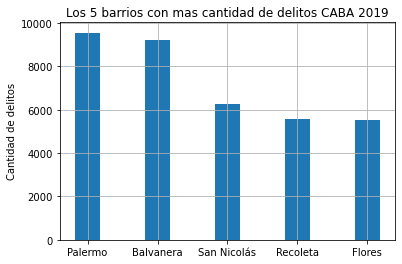

In [16]:
labels = [barrio_lista[0], barrio_lista[1], barrio_lista[2], barrio_lista[3], barrio_lista[4]]
robos = [barrio_dic['Palermo'], barrio_dic['Balvanera'], barrio_dic['San Nicolás'], barrio_dic['Recoleta'], barrio_dic['Flores']]
width = 0.35
fig, ax = plt.subplots()
ax.bar(labels, robos, width, label='Barrios')
ax.set_ylabel('Cantidad de delitos')
ax.set_title('Los 5 barrios con mas cantidad de delitos CABA 2019')
plt.grid(True)
plt.show()

In [17]:
# cantidad por tipo de delito y el total registrada
tipo_delitos = delito2019['tipo_delito'].value_counts()
print(tipo_delitos)
print('------------------')
cantidadDelitos = delito2019['cantidad_registrada'].sum()
print('cantidad registrada', cantidadDelitos)

Robo (con violencia)     62796
Hurto (sin violencia)    49271
Lesiones                  5408
Homicidio                  186
Name: tipo_delito, dtype: int64
------------------
cantidad registrada 117668.0


In [18]:
# cantidad de delitos x dia - buscar el dia con mayor delito
delito2019.columns

Index(['fecha', 'franja_horaria', 'tipo_delito', 'subtipo_delito',
       'cantidad_registrada', 'comuna', 'barrio', 'lat', 'long'],
      dtype='object')

In [21]:
dias_delito = delito2019.groupby('fecha')['cantidad_registrada'].sum()
#dias_delito

dias = dict(delito2019['fecha'].value_counts())
#dias

a = dias['2019-03-11']
lista = list(dias)
print('El dia con la cantidad mayor de delitos fue:', lista[0], "con", a, "delitos")


El dia con la cantidad mayor de delitos fue: 2019-03-11 con 467 delitos


In [23]:
# la hora en la que ocurren mas delitos
horas = dict(delito2019['franja_horaria'].value_counts())
print(horas)

b = horas['18']
lista = list(horas)

print('la mayor cantidad de delitos ocurren a las:', lista[0], 'hs con', b, 'delitos')

{'18': 7415, '19': 7224, '20': 6990, '17': 6612, '16': 6518, '14': 6458, '12': 6407, '21': 6337, '15': 6315, '13': 6044, '10': 5536, '11': 5527, '22': 5449, '8': 5122, '9': 4931, '23': 4500, '7': 3897, '0': 3073, '6': 2998, '1': 2445, '5': 2357, '2': 1965, '4': 1814, '3': 1719, 0: 8}
la mayor cantidad de delitos ocurren a las: 18 hs con 7415 delitos
